# Audio Processing

Thanks to Colin Jemmott for UC San Diego, October 2018

Day 2:
* DIY speaking recognition (silence versus talking)
* IBM Open Source API for sound classification.

# Recorded Sounds

Import `data/first_sound.wav` as an array using the provided code.  Then look at some statistics, including min, max, mean, and some raw samples.  Perhaps even plot it!

In [15]:
%matplotlib inline

import matplotlib.pyplot as mpl
import numpy as np

In [16]:
from scipy.io.wavfile import read
import numpy as np

# Read in wav file as an array
a = read("data/first_sound.wav")
samplingRate = a[0]
audioData = a[1]

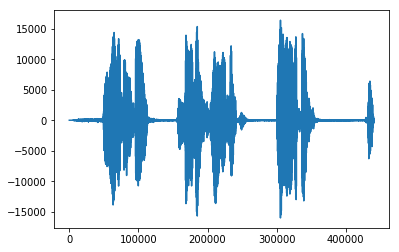

In [27]:
mpl.plot(audioData)

Listen to audio from within the notebook using: `IPython.display.Audio`

In [25]:
from IPython import display
display.Audio(audioData, rate = samplingRate)

# Add Noise

Add noise to the recording, matching the maximum value of the recording to the maximum value of the noise.  Then use the provided code to store it as a wav file.  Download it and listen -- or listen to it in the notebook.

In [22]:
# Your code here
audioWithNoise = np.random.randn(len(audioData))*audioData

In [23]:
from scipy.io.wavfile import write

# Store the noise as a wav file
scaled = np.int16(audioWithNoise/np.max(np.abs(audioWithNoise)) * 32767)
write('output_with_noise.wav', 44100, scaled)

In [26]:
display.Audio(scaled, rate = samplingRate)

# Trim the quiet parts

There are quite a few long pauses in the recording.  Using the first version, without the noise, write some code that will remove any pause longer than a half second.  Write down the wav file and see if it did what you thought.

In [8]:
# your code here
#segment into .5 second intervals, see if elements are all within threshold if so remove
trimmed = ...

SyntaxError: invalid syntax (<ipython-input-8-fca5f6799d19>, line 2)

In [ ]:
scaled = np.int16(trimmed/np.max(np.abs(trimmed)) * 32767)

write('output_without_quiet.wav', 44100, scaled)

In [ ]:
display.Audio(scaled, rate = samplingRate)

# Speech recognition

This uses IBM's [MAX Audio Classifier](https://github.com/IBM/MAX-Audio-Classifier) deployed to an [Azure Container Instance](https://azure.microsoft.com/en-us/services/container-instances/) on Microsoft's cloud.  It took me less than ten minutes to get the docker container running in the cloud.  The classifier is [open source](https://github.com/IBM/MAX-Audio-Classifier) so you can modify it.  Better yet, there are [lots of other free open source models from IBM](https://developer.ibm.com/exchanges/models/) also!

You can read more about the ontology used for the training data [here](https://research.google.com/audioset/ontology/index.html).

In [ ]:
import requests
import json

In [ ]:
#curl -F "audio=@assets/thunder.wav" -XPOST http://localhost:5000/model/predict

fileName = "data/first_sound.wav"

url = "http://168.62.8.78:5000/model/predict"
files = {"audio":open(fileName, 'rb')}
r = requests.post(url, files=files)

In [ ]:
json.loads(r.text)

### Now do the same thing with other wav files!  
* What happens if you use the one where you added noise?
* What happens if you take only a portion of an audio file?
* What happens if you mix the recordings together? 
* What happens if you speed up / slow down the recordings?

In [ ]:
# your code here